https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

**Mod A:**

Preprocessing

Imputation

Clustering

EDA

Regression

**Mod B:**

NLP

AutoEncoder

# Introduction

According to the world health organization, Cardiovascular diseases (CVDs) are the leading cause of death globally. In 2019 alone, around 17.9 million people died from CVDs. Of these deaths, **85%** of them were due to heart diseases. There are many factors that play a role in increasing the risk of heart disease. Identifying these factors and their impact is paramount in the field of healthcare. Identifying patients who are at greater risk enables medical professionals to respond quickly and efficiently, saving more lives.

### About the Dataset:

The [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the [2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults](https://www.cdc.gov/brfss/annual_data/annual_data.htm). For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. 

**We made the decision to manually clean and predict the missing values after downloading the original dataset.**

<https://www.cdc.gov/brfss/annual_data/annual_data.htm>

Below is a description of the features collected for each patient: 

| # | Feature | Description
| --- | --- | --- 
| 1 | HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
| 2 | BMI | Body Mass Index (BMI)
| 3 | Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
| 4 | AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
| 5 | Stroke | (Ever told) (you had) a stroke?
| 6 | PhysicalHealth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 
| 7 | MentalHealth | Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
| 8 | DiffWalking | Do you have serious difficulty walking or climbing stairs?
| 9 | Sex | Are you male or female?
| 10 | AgeCategory | Fourteen-level age category
| 11 | Race | Imputed race/ethnicity value
| 12 | Diabetic | (Ever told) (you had) diabetes?
| 13 | PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
| 14 | GenHealth | Would you say that in general your health is...
| 15 | SleepTime | On average, how many hours of sleep do you get in a 24-hour period?
| 16 | Asthma | (Ever told) (you had) asthma?
| 17 | KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
| 18 | SkinCancer | (Ever told) (you had) skin cancer?

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pylab import rcParams
import plotly.graph_objects as go
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import scipy
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Data Preprocessing

In any data-driven project, data preprocessing is an essential step that can significantly impact the quality and performance of machine learning models. The heart disease dataset requires thorough data preprocessing to ensure that the data is in a suitable format for building predictive models. In this section, we outline the various data preprocessing steps performed on the dataset.

**Data Cleaning**

Handling Missing Values: Missing data points were identified and addressed. Depending on the extent of missing data in each column, we applied appropriate strategies such as removal and advanced imputation methods.

Duplicate Rows: Duplicate rows, if any, were removed to avoid biasing the model.

**Handling Outliers**

Outliers in the data were identified and treated through techniques such as trimming, transformation, or removal.

**Feature Engineering**

Creating New Features: New features were engineered to potentially enhance the predictive power of the model.
Feature Modification: Existing features were transformed or modified to better align with the model's assumptions.

**Value Mapping**

Specific values in the dataset were mapped to new values to ensure consistency and to address irregularities.

**Data Visualization**

Exploratory Data Analysis (EDA): Visualizations were created to gain insights into the data, identify patterns, and understand the relationships between features and the target variable.

In [2]:
df = pd.read_csv('datasets/heart_cdc.csv')

In order to have comparisons afterwards, we will keep the columns as the Kaggle dataset's column.

In [3]:
# Define a dictionary for column renaming
columns_name_mapping = {
    "cvdcrhd4": "HeartDisease",
    "weight2": "Weight", 
    "height3":"Height", 
    "_smoker3":"Smoking", 
    "drnkany5":"AlcoholDrinking", 
    "cvdstrk3":"Stroke", 
    "physhlth":"PhysicalHealth",
    "menthlth":"MentalHealth", 
    "diffwalk":"DiffWalking", 
    "_sex":"Sex", 
    "_ageg5yr":"AgeCategory", 
    "_race":"Race", 
    "diabete4":"Diabetic", 
    "exerany2":"PhysicalActivity", 
    "genhlth":"GenHealth", 
    "sleptim1":"SleepTime", 
    "_asthms1":"Asthma", 
    "chckdny2":"KidneyDisease", 
    "chcscncr":"SkinCancer",
    "_bmi5":"BMI_calc"
}

# Define a list of the columns you want to keep
columns_to_keep = [ 
    "HeartDisease",
    "Weight", 
    "Height", 
    "Smoking", 
    "AlcoholDrinking", 
    "Stroke", 
    "PhysicalHealth",
    "MentalHealth", 
    "DiffWalking", 
    "Sex", 
    "AgeCategory", 
    "Race", 
    "Diabetic", 
    "PhysicalActivity", 
    "GenHealth", 
    "SleepTime", 
    "Asthma", 
    "KidneyDisease", 
    "SkinCancer",
    "BMI_calc"
]

# Rename columns and select the columns to keep in one step
df = df.rename(columns=columns_name_mapping)[columns_to_keep]

In [4]:
df.head()

,HeartDisease,Weight,Height,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,2.0,106.0,507.0,1,2,2.0,3.0,30.0,2.0,2,8,1.0,1.0,1.0,2.0,5.0,1,2.0,1.0,1660.0
1,2.0,170.0,504.0,9,9,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,2,2.0,2.0,2918.0
2,2.0,7777.0,508.0,4,2,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,3,2.0,2.0,NaN
3,2.0,9999.0,9999.0,4,2,2.0,88.0,88.0,2.0,2,13,1.0,3.0,2.0,1.0,6.0,3,2.0,2.0,NaN
4,2.0,126.0,506.0,4,2,1.0,88.0,88.0,2.0,2,13,1.0,3.0,1.0,2.0,7.0,3,2.0,2.0,2034.0


In [5]:
df.isna().any()

HeartDisease         True
Weight               True
Height               True
Smoking             False
AlcoholDrinking     False
Stroke               True
PhysicalHealth       True
MentalHealth         True
DiffWalking          True
Sex                 False
AgeCategory         False
Race                 True
Diabetic             True
PhysicalActivity     True
GenHealth            True
SleepTime            True
Asthma              False
KidneyDisease        True
SkinCancer           True
BMI_calc             True
dtype: bool

<Figure size 1600x800 with 0 Axes>

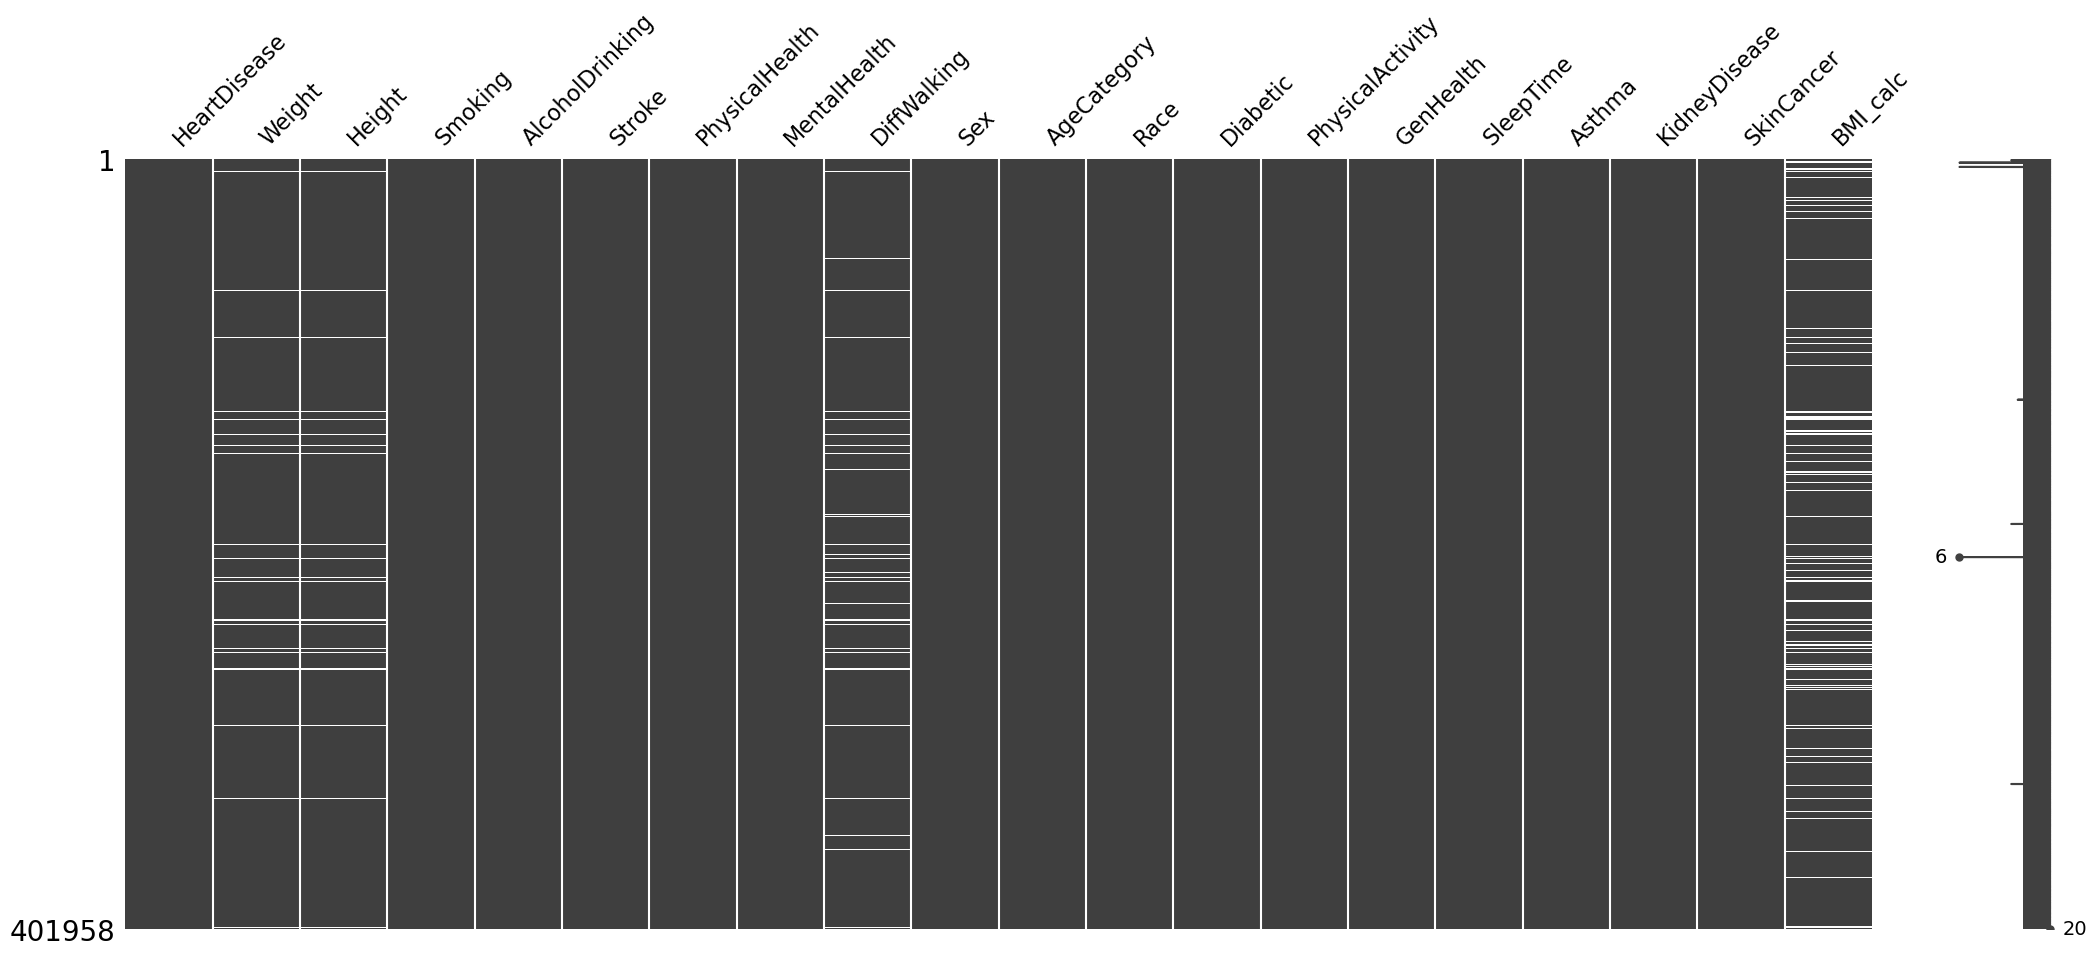

<Figure size 1600x800 with 0 Axes>

In [6]:
msno.matrix(df)
plt.figure(figsize = (16,8))

In [7]:
print(df.isna().sum())

HeartDisease            3
Weight               9852
Height              10824
Smoking                 0
AlcoholDrinking         0
Stroke                  3
PhysicalHealth          5
MentalHealth            5
DiffWalking         15280
Sex                     0
AgeCategory             0
Race                    1
Diabetic                6
PhysicalActivity        3
GenHealth               8
SleepTime               3
Asthma                  0
KidneyDisease           6
SkinCancer              3
BMI_calc            41357
dtype: int64


In [6]:
string_df = df.copy()

### Value Mapping

**'HeartDisease':** We consider YES for 1 and NO for 2, 'Not Clear' for 7 and 'Refused' for 9 cases.

**'AlcoholDrinking':** We consider YES for 1 and NO for 2, 'Not Clear' for 7 and 'Refused' for 9 cases.

**'Stroke':** We consider YES for 1 and NO for 2, 'Not Clear' for 7 and 'Refused' for 9 cases.

**'PhysicalActivity':** We consider YES for 1 and NO for 2, 'Not Clear' for 7 and 'Refused' for 9 cases.

**'DiffWalking':** We consider YES for 1 and NO for 2, 'Not Clear' for 7 and 'Refused' for 9 cases.

**'SkinCancer':** We consider YES for 1 and NO for 2, 'Not Clear' for 7 and 'Refused' for 9 cases.

**'KidneyDisease':** We consider YES for 1 and NO for 2, 'Not Clear' for 7 and 'Refused' for 9 cases.

**'Asthma':** We consider Current for 1, Former for 2 and Never for 3, also 9 as 'Not Clear'.

**'Smoking':** We consider Smoker for 1, Approximate Smoker for 2, Former Smoker for 3 and Never for 4, also 9 as 'Not Clear'.

**'Sex':** We consider 'Male' for 1 and 'Female' for 2.

**'AgeCategory':** We consider '18-24' for 1, '25-29' for 2, '30-34' for 3, '35-39' for 4, '40-44' for 5, '45-49' for 6, '50-54' for 7, '55-59' for 8, '60-64' for 9, '65-69' for 10, '70-74' for 11, '75-79' for 12, '80+' for 13, also 'Not Clear' as 14.

**'Race':** We consider 'White' for 1, 'Black' for 2, 'Native' for 3, 'Asian' for 4, 'Hawaian' for 5, 'Other' for 6, 'Multiracial' for 7, 'Hispanic' for 8, and 9 as 'Not Clear'.

**'Diabetic':** We consider 'Yes' for 1, 'Yes(Pregnant)' for 2, 'No' for 3, 'Border Line' for 4, also 7 as 'Not Clear' and 9 as 'Refused'.

**'GenHealth':** We consider 'Excellent' for 1, 'Very Good' for 2, 'Good' for 3, 'Fair' for 4, 'Poor' for 5, also 7 as 'Not Clear' and 9 as 'Refused'.

In [7]:
value_mapping = {
    'HeartDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'AlcoholDrinking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Stroke': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'PhysicalActivity': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'DiffWalking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'SkinCancer': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'KidneyDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Asthma': {1:'Current', 2:'Former', 3:'Never', 9:'Not Clear'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 4:'Never', 9:'Not Clear'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80+', 14:'Not Clear'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic', 9:'Not Clear'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 3:'No', 4:'Border Line', 7:'Not Clear', 9:'Refused'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 7:'Not Clear', 9:'Refused'},
}

# Use the replace() method to change the values in the DataFrame
string_df.replace(value_mapping, inplace=True)

In [8]:
cat_var = ['HeartDisease', 'AlcoholDrinking', 'Stroke', 'Smoking', 'PhysicalActivity', 'DiffWalking', 'SkinCancer', 'Asthma', 'KidneyDisease', 'Race', 'Diabetic', 'GenHealth', 'AgeCategory']

In [11]:
value_counts_dict = {}

for column in cat_var:
    value_counts = string_df[column].value_counts()
    value_counts_dict[column] = value_counts
    
for column, counts in value_counts_dict.items():
    print(f"Value Counts for {column}:")
    print(counts)
    print()

Value Counts for HeartDisease:
No           376058
Yes           22598
Not Clear      2962
Refused         337
Name: HeartDisease, dtype: int64

Value Counts for AlcoholDrinking:
Yes          191565
No           183618
Refused       23177
Not Clear      3598
Name: AlcoholDrinking, dtype: int64

Value Counts for Stroke:
No           385095
Yes           15677
Not Clear       891
Refused         292
Name: Stroke, dtype: int64

Value Counts for Smoking:
Never                 224535
Former Smoker         103835
Smoker                 38152
Not Clear              21100
Approximate Smoker     14336
Name: Smoking, dtype: int64

Value Counts for PhysicalActivity:
Yes          305883
No            95393
Not Clear       451
Refused         228
Name: PhysicalActivity, dtype: int64

Value Counts for DiffWalking:
No           327864
Yes           57335
Not Clear      1000
Refused         479
Name: DiffWalking, dtype: int64

Value Counts for SkinCancer:
No           364269
Yes           36414
Not Cl

In [9]:
num_var = ['Weight', 'Height', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [13]:
value_counts_dict = {}

for column in num_var:
    value_counts = string_df[column].value_counts()
    value_counts_dict[column] = value_counts
    
for column, counts in value_counts_dict.items():
    print(f"Value Counts for {column}:")
    print(counts)
    print()

Value Counts for Weight:
200.0     19745
180.0     18493
9999.0    17968
150.0     16636
160.0     16606
          ...  
565.0         1
523.0         1
9335.0        1
9205.0        1
9240.0        1
Name: Weight, Length: 574, dtype: int64

Value Counts for Height:
506.0     33784
504.0     33015
507.0     30496
505.0     29791
510.0     28639
          ...  
9132.0        1
9121.0        1
209.0         1
704.0         1
9139.0        1
Name: Height, Length: 147, dtype: int64

Value Counts for PhysicalHealth:
88.0    278671
30.0     25049
2.0      17864
1.0      12492
3.0      10371
5.0       9192
77.0      7095
10.0      6707
15.0      6247
7.0       5692
4.0       5396
20.0      4018
14.0      3561
99.0      1591
6.0       1531
25.0      1460
8.0       1149
21.0       774
12.0       735
28.0       574
29.0       265
9.0        234
18.0       214
16.0       172
27.0       165
17.0       129
13.0       117
11.0       108
22.0       106
24.0        87
26.0        83
23.0        62
19.

In [14]:
height_gt_6000 = df[df['Height'] > 6000]['Height']
print(height_gt_6000.value_counts())

9999.0    6863
7777.0    4039
9160.0     175
9170.0     171
9165.0     160
          ... 
9114.0       1
9132.0       1
9134.0       1
9202.0       1
9139.0       1
Name: Height, Length: 90, dtype: int64


In [15]:
height_gt_6000 = df[df['Weight'] > 6000]['Weight']
print(height_gt_6000.value_counts())

9999.0    17968
7777.0     7095
9070.0      108
9060.0       75
9075.0       73
          ...  
9147.0        1
9256.0        1
9023.0        1
9099.0        1
9240.0        1
Name: Weight, Length: 120, dtype: int64


### Value Mapping for Imputation

**'HeartDisease':** We consider 1 for YES and 0 for NO, we also assume 'Not Clear' and 'Refused' as Nan.

**'Weight':** We consider values more than 7000 like 9999 and 7777 as Nan.

**'Height':** We consider values more than 7000 like 9999 and 7777 as Nan.

**'AlcoholDrinking':** We consider 1 for YES and 0 for NO, we also assume 'Not Clear' and 'Refused' as Nan

**'Stroke':** We consider 1 for YES and 0 for NO, we also assume 'Not Clear' and 'Refused' as Nan

**'PhysicalActivity':** We consider 1 for YES and 0 for NO, we also assume 'Not Clear' and 'Refused' as Nan

**'DiffWalking':** We consider 1 for YES and 0 for NO, we also assume 'Not Clear' and 'Refused' as Nan

**'SkinCancer':** We consider 1 for YES and 0 for NO, we also assume 'Not Clear' and 'Refused' as Nan

**'KidneyDisease':** We consider 1 for YES and 0 for NO, we also assume 'Not Clear' and 'Refused' as Nan

**'Asthma':** We consider 0 for Never , 1 for Current and 2 for Former, also 'Not Clear' as Nan

**'Smoking':** We consider 0 for Never, 1 for Smoker, 2 for Approximate Smoker and 3 for Former Smoker, also 'Not Clear' as Nan

**'AgeCategory':** We consider 'Not Clear' cases as Nan

**'Race':** We consider 'Not Clear' cases as Nan, also 'Border Line' as No.

**'Diabetic':** We consider 'Not Clear' and 'Refused' cases as Nan

**'GenHealth':** We consider 1 for 'Excellent', 2 for 'Very Good', 3 for 'Good', 4 for 'Fair', 5 for 'Poor', aslo 'Not Clear' and 'Refused' cases as Nan

**'SleepTime':** We consider 99s as Nan because logically it is not possible to have 99 hours of sleep average per day

**'MentalHealth':** We consider 99s and 88s as Nan because logically it is not possible to have 99 or 88 days per month

**'PhysicalHealth':** We consider 99s and 88s as Nan because logically it is not possible to have 99 or 88 days per month

In [10]:
value_mapping = {
    'HeartDisease': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'AlcoholDrinking': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'Stroke': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'PhysicalActivity': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'DiffWalking': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'SkinCancer': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'KidneyDisease': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'Asthma': {1:1, 2:2, 3:0, 9:np.nan},
    'Smoking': {1:1, 2:2, 3:3, 4:0, 9:np.nan},
    'AgeCategory': {14:np.nan},
    'Race': {9:np.nan},
    'Diabetic': {1:1, 2:2, 3:0, 4:0, 7:np.nan, 9:np.nan},
    'GenHealth': {1:1, 2:2, 3:3, 4:4, 5:5, 7:np.nan, 9:np.nan},
    'SleepTime': {99:np.nan},
    'MentalHealth': {99:np.nan, 88:np.nan},
    'PhysicalHealth': {99:np.nan, 88:np.nan},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [11]:
df['Weight'] = [value if value <= 7000 else np.nan for value in df['Weight']]
df['Height'] = [value if value <= 7000 else np.nan for value in df['Height']]

**Add BMI Column:**

Weight: How much do you weigh without shoes?

Height: How tall are you without shoes?

height(meters) = height(inches) / 12 * 0.0254

BMI = weight(pounds) / (height(meters) ** 2)

In [13]:
df['BMI'] = np.nan
for i in range(len(df['Height'])):
        if not pd.isna(df['Height'].iloc[i]) and not pd.isna(df['Weight'].iloc[i]):
                height_str = str(df['Height'].iloc[i])
                height_inches = int(height_str[0]) * 12 + int(height_str[1:3])
                df['BMI'].iloc[i] = df['Weight'].iloc[i] / (height_inches ** 2) * 703
                
df = df.drop(['Weight', 'Height', 'BMI_calc'], axis=1)
df['BMI'] = df['BMI'].round(2)

/var/folders/kg/fftk_3yx6318lz6j3g83d5p80000gq/T/ipykernel_4020/4064262798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'].iloc[i] = df['Weight'].iloc[i] / (height_inches ** 2) * 703


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.60
1,0.0,NaN,NaN,0.0,NaN,NaN,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,29.18
2,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,1.0,NaN,NaN,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,20.33
5,0.0,3.0,0.0,0.0,20.0,30.0,0.0,1,10.0,1.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,26.58
6,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2,12.0,1.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,24.21
7,0.0,1.0,NaN,0.0,15.0,10.0,0.0,2,10.0,2.0,1.0,1.0,4.0,6.0,0.0,0.0,0.0,26.57
8,0.0,0.0,0.0,0.0,28.0,NaN,1.0,2,5.0,1.0,0.0,1.0,2.0,8.0,0.0,0.0,0.0,23.71
9,1.0,3.0,0.0,0.0,6.0,NaN,1.0,2,12.0,2.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,28.87


Upon initial inspection, the following is observed:
1.   We have 319795 samples.
2.   We no missing values.
3.   The majority of features are categorical.
4.   *BMI* is skewed.
5.   *PhysicalHealth* and	*MentalHealth* are severly skewed due to the number of zeros.
6.   *SleepTime* is normally distributed.
7.   There is a severe class imbalance (heart disease vs healthy)
8.   *Alcohol* drinking is imbalanced.
9.   *Sroke* is imbalanced.
10.   *DiffWalking* is imbalanced.
11.   *Age* is categorical (divided into bins).
12.   *Race* is imbalanced, with the majority being white.
13.   *Diabetic* is imbalanced.
14.   *PhysicalActivity* is imbalanced
15.   *Asthma* is imbalanced
16.  *KidneyDisease* is imbalanced
17.  *SkinCancer* is imbalanced
18.  *We can see that all numerical variables are skewed and contain outliers.

- Most of people in our data are white and have no diabetic.
- Most of them had done a physical activity during the past 30 days other than their regular job and in general they have very good health as they said.
- A litle of them who have asthma, kidney disease and skin cancer.
- Most people said that they have generaly very good health. A few of people who said that they have generaly a poor health.

Insights and takeaways drawn from data exploration:


1.   In our sample, around 8 among 100 individuals suffer from heart disease.

2.   The BMI of heart disease patients is slightly higher than that of healthy individuals.

3.   The older the individual, the more susceptible they are to heart disease.

4.   \~10% of males suffer from heart disease, while only \~7% of females do.

5.   The pecentage of heart disease is highest (> 10%) among Native americans, followed by whites (\~9%). The least percentage of heart disease (\~3%) is among asians.

6.   A lot more people who suffer from heart disease say they have poor or fair health compared to those who don't.

7.   79% of healthy individuals have been physically active in the past 30 days, compared to 64% in heart disease patients.

8.   Abnormal sleeep duration is more prevalent in heart disease patients. Even though heart disease patients make 8.5% of the sample, they have higher percentages of sleep less than 6 hours or more than 9 hours, which is considered abnormal.

9.   \~12% of people who smoke suffer from heart disease. In contrast, \~5% of non-smokers suffer from heart disease.

10.   Surprisingly, people who drink alcohol have a lower percentage of heart disease (\~4%) than those who do not (\~9%).

11.   Having a stroke is highly correlacted with heart disease. People who have had a stroke before have a heart disease percentage of around 48%. On the other hand, people who did not suffer a stroke had a significantly lower percentage of heart disease (\~8%).

12.   Diabetic people are at higher risk of heart disease (\~25%).

13.   Asthmatic people are at a slightly higher risk of heart disease.

14.   Those who have suffered from kidney disease are at a sginificantly higher risk of heart disease. With a percentage of \~30% compared to ~9% in healthy people.

15.   People who suffered from skin cancer are at a moderately higher risk of heart disease (\~18% vs \~9%).

16.   Difficilty of walking is present in ~18% of heart disease patients vs ~7% in healthy individuals.

17. The BMI distribution differs slightly in patients of different diseases. With diabetic people having the highest BMI mode, and stroke victims having the lowest BMI mode.

18.  Mental health, sleep duration, and physical health are similar among people who suffer from different dieseases.

19.  ~64% of people who say they have poor health are smokers. While people who say they have excellent health are 30% smokers.



# Imputation

### Missing Data Imputation

Addressing missing data is a fundamental aspect of data preprocessing. When missing data was encountered, appropriate imputation techniques were applied, such as using the mean, median, or mode, to fill in missing values.
These cleaning and preprocessing steps are essential to create a clean and consistent dataset that is suitable for building machine learning models. Detailed documentation of these steps is crucial for transparency, reproducibility, and collaboration in the data analysis process.

### Types of Missing Data:

In the field of data analysis and machine learning, missing data is a common challenge. Understanding the types of missing data is crucial for choosing the right imputation technique. There are three primary types of missing data:

- **Missing Completely at Random (MCAR):** In this type, the missing data points are randomly distributed throughout the dataset, and the likelihood of a data point being missing is unrelated to any observed or unobserved variables. MCAR is considered a desirable type of missing data because it does not introduce bias into the analysis.

- **Missing at Random (MAR):** Missing data is considered MAR when the probability of data being missing depends on other observed variables but not on the missing data itself. This type can still lead to unbiased results if the observed variables related to missingness are included in the analysis.

- **Missing Not at Random (MNAR):** In MNAR, the probability of data being missing is related to the missing data itself. MNAR can introduce bias into the analysis as the missing values may be systematically different from the observed data.

### Decision Tree Imputation

Imputing missing data is a crucial step in data preprocessing. It helps ensure that the dataset is complete and ready for machine learning modeling. Various imputation techniques are available, and the choice of technique depends on the nature of the data and the type of missing data.

One imputation method that we applied to the heart disease dataset is decision tree imputation. Decision tree imputation involves using a decision tree model to predict and fill in missing values based on other observed variables. This technique offers several advantages:

- **Non-linearity:** Decision trees can capture complex, non-linear relationships in the data. They are well-suited for handling non-linear relationships between variables, which is common in real-world datasets.

- **Handling Categorical Data:** Decision trees can naturally handle both categorical and numerical data, making them suitable for datasets with a mix of variable types.

- **Variable Importance:** Decision tree models can provide insights into the importance of each feature for imputing missing values. This information can be valuable for understanding which variables play a key role in imputation.
Robustness to Outliers: Decision trees are robust to outliers in the data, making them a suitable choice when missing data is related to outliers.

By utilizing decision tree imputation, we aim to fill in missing values in a way that preserves the underlying relationships within the data, thereby improving the quality of the dataset and enhancing the performance of machine learning models.

The choice of imputation technique should be driven by the nature of the data and the specific objectives of the analysis. In our case, decision tree imputation was selected due to its ability to capture non-linear relationships and handle both categorical and numerical data effectively.

In [23]:
cat_var = ['HeartDisease', 'AlcoholDrinking', 'Stroke', 'Smoking', 'PhysicalActivity', 'DiffWalking', 'SkinCancer', 'Asthma', 'KidneyDisease', 'Race', 'Diabetic', 'GenHealth', 'AgeCategory']

In [16]:
def categorical_imputer(df, column_name: str):
    var_known = df.dropna(subset=[column_name])
    var_missing = df[df[column_name].isna()]
    
    X_known = var_known.drop(columns=[column_name])
    y_known = pd.DataFrame(var_known[column_name])
    
    X_known = X_known.apply(LabelEncoder().fit_transform)
    
    Tree = DecisionTreeClassifier(random_state=0)
    Tree.fit(X_known, y_known)
    
    missed_values = var_missing.drop(columns=[column_name])
    missed_values[column_name] = Tree.predict(missed_values)
    print("Count of NaN's in ", column_name, " were: ", missed_values[column_name].shape[0])
    
    df.loc[var_missing.index, column_name] = missed_values[column_name]
    
    print(column_name, ' has been imputed\n')
    

In [17]:
for variable in cat_var:
    categorical_imputer(df, variable)

Count of NaN's in  HeartDisease  were:  3286
HeartDisease  has been imputed

Count of NaN's in  AlcoholDrinking  were:  23167
AlcoholDrinking  has been imputed

Count of NaN's in  Stroke  were:  1170
Stroke  has been imputed

Count of NaN's in  Smoking  were:  17652
Smoking  has been imputed

Count of NaN's in  PhysicalActivity  were:  669
PhysicalActivity  has been imputed

Count of NaN's in  DiffWalking  were:  13391
DiffWalking  has been imputed

Count of NaN's in  SkinCancer  were:  1258
SkinCancer  has been imputed

Count of NaN's in  Asthma  were:  2909
Asthma  has been imputed

Count of NaN's in  KidneyDisease  were:  1500
KidneyDisease  has been imputed

Count of NaN's in  Race  were:  8581
Race  has been imputed

Count of NaN's in  Diabetic  were:  798
Diabetic  has been imputed

Count of NaN's in  GenHealth  were:  949
GenHealth  has been imputed

Count of NaN's in  AgeCategory  were:  7050
AgeCategory  has been imputed



In [18]:
df.isna().any()

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth       True
MentalHealth         True
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime            True
Asthma              False
KidneyDisease       False
SkinCancer          False
BMI                  True
dtype: bool

In [21]:
num_var = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [22]:
def numerical_imputer(df, column_name: str):
    var_known = df.dropna(subset=[column_name])
    var_missing = df[df[column_name].isna()]
    
    X_known = var_known.drop(columns=[column_name])
    y_known = pd.DataFrame(var_known[column_name])
    
    X_known = X_known.apply(LabelEncoder().fit_transform)
    
    Tree = DecisionTreeRegressor(random_state=0)
    Tree.fit(X_known, y_known)
    
    missed_values = var_missing.drop(columns=[column_name])
    missed_values[column_name] = Tree.predict(missed_values)
    print("Count of NaN's in ", column_name, " were: ", missed_values[column_name].shape[0])
    
    df.loc[var_missing.index, column_name] = missed_values[column_name]
    
    print(column_name, ' has been imputed\n')

In [23]:
for variable in num_var:
    numerical_imputer(df, variable)

Count of NaN's in  BMI  were:  32442
BMI  has been imputed

Count of NaN's in  PhysicalHealth  were:  258923
PhysicalHealth  has been imputed

Count of NaN's in  MentalHealth  were:  237033
MentalHealth  has been imputed

Count of NaN's in  SleepTime  were:  569
SleepTime  has been imputed



In [24]:
df.isna().any()

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
BMI                 False
dtype: bool

In [25]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column} : {unique_values}")

HeartDisease : 2
Smoking : 4
AlcoholDrinking : 2
Stroke : 2
PhysicalHealth : 31
MentalHealth : 35
DiffWalking : 2
Sex : 2
AgeCategory : 13
Race : 8
Diabetic : 3
PhysicalActivity : 2
GenHealth : 5
SleepTime : 26
Asthma : 3
KidneyDisease : 2
SkinCancer : 2
BMI : 4786


In [26]:
imputed_df = df.copy()

In [27]:
imputed_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.600
1,0.0,3.0,0.0,0.0,30.0,1.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,29.180
2,0.0,0.0,0.0,0.0,30.0,1.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,31.950
3,0.0,0.0,0.0,0.0,30.0,5.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,24.884
4,0.0,0.0,0.0,1.0,77.0,20.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,20.330


In [28]:
imputed_df.to_csv('numerical_data.csv', index=True)

# EDA

Value Mapping for EDA

In [42]:
value_mapping = {
    'HeartDisease': {1:'Yes', 0:'No'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 0:'Never'},
    'AlcoholDrinking': {1:'Yes', 0:'No'},
    'Stroke': {1:'Yes', 0:'No'},
    'DiffWalking': {1:'Yes', 2:'No'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80 or More'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 0:'No'},
    'PhysicalActivity': {1:'Yes', 2:'No'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor'},
    'Asthma': {1:'Current', 2:'Former', 0:'Never'},
    'KidneyDisease': {1:'Yes', 0:'No'},
    'SkinCancer': {1:'Yes', 0:'No'},
}

# Use the replace() method to change the values in the DataFrame
imputed_df.replace(value_mapping, inplace=True)

In [43]:
imputed_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,No,Smoker,No,No,3.0,30.0,0.0,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,16.60
1,No,Smoker,Yes,No,88.0,88.0,0.0,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,29.18
2,No,Never,No,No,88.0,88.0,0.0,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,31.95
3,No,Never,No,No,88.0,88.0,0.0,Female,80 or More,White,No,0.0,Excellent,6.0,Never,No,No,27.37
4,No,Never,No,Yes,88.0,88.0,0.0,Female,80 or More,White,No,Yes,Very Good,7.0,Never,No,No,20.33


In [45]:
imputed_df.to_csv('categorical_data.csv', index=True)

# Clustering

In [90]:
df = pd.read_csv('datasets/numerical_data.csv')

In [91]:
df = df.drop("Unnamed: 0",axis=1)

In [92]:
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.600
1,0.0,3.0,0.0,0.0,30.0,1.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,29.180
2,0.0,0.0,0.0,0.0,30.0,1.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,31.950
3,0.0,0.0,0.0,0.0,30.0,5.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,24.884
4,0.0,0.0,0.0,1.0,77.0,20.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,20.330


### Cluster analysis for those have heart disease

In [93]:
heart_disease_data = df[df['HeartDisease'] == 1]

In [94]:
features_data = heart_disease_data.drop('HeartDisease', axis=1)

In [95]:
scaler = StandardScaler()

Based on the Elbow Method, we choose an appropriate K value

In [96]:
# Determine the optimal number of clusters (K)

wcss = [] # Within-cluster sum of squares
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_data)
    wcss.append(kmeans.inertia_)

/Users/yaya/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yaya/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yaya/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yaya/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

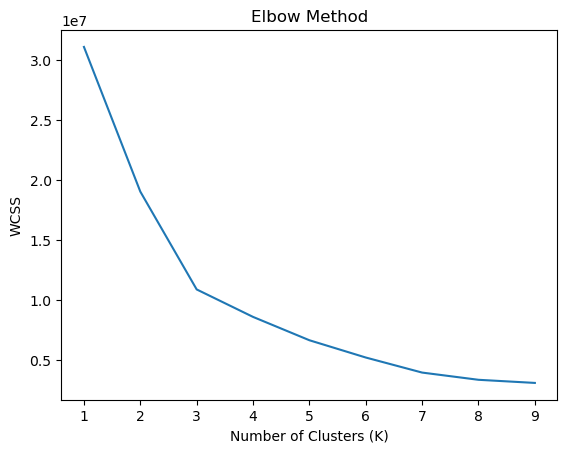

In [97]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [98]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(features_data)

/Users/yaya/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [99]:
heart_disease_data['cluster'] = cluster_labels

/var/folders/kg/fftk_3yx6318lz6j3g83d5p80000gq/T/ipykernel_4020/687171112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_data['cluster'] = cluster_labels


In [100]:
# Perform PCA for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [101]:
# Add cluster labels to the PCA results
principal_df['cluster'] = cluster_labels

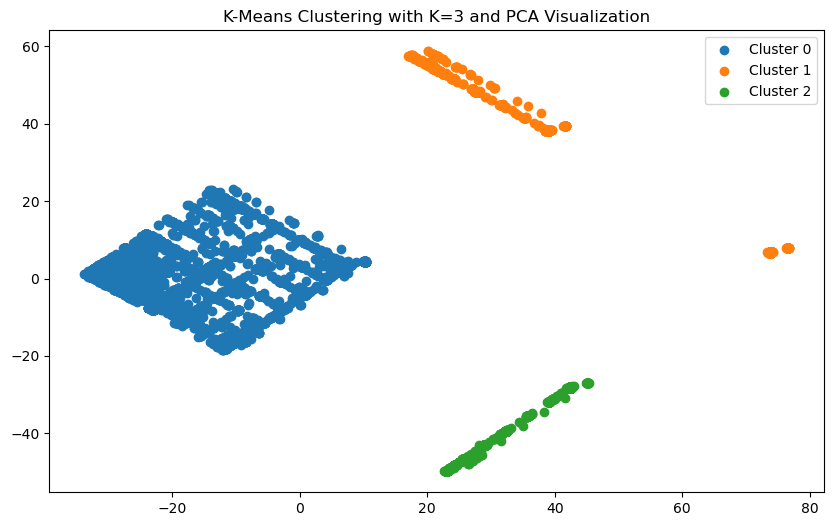

In [102]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = principal_df[principal_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering with K=3 and PCA Visualization')
plt.legend()
plt.show()

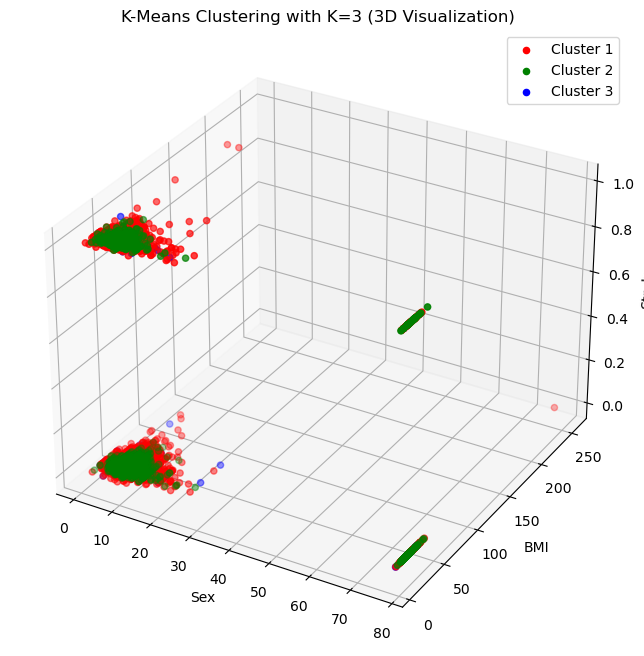

In [110]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Plot data points in 3D space
for cluster in range(3):
    cluster_data = heart_disease_data[heart_disease_data['cluster'] == cluster]
    ax.scatter(cluster_data['SleepTime'], cluster_data['BMI'], cluster_data['Stroke'],
               c=colors[cluster], label=f'Cluster {cluster + 1}')

ax.set_xlabel('Sex')
ax.set_ylabel('BMI')
ax.set_zlabel('Stroke')
ax.set_title(f'K-Means Clustering with K=3 (3D Visualization)')

plt.legend()
plt.show()

### Cluster analysis for those have heart disease

In [84]:
df = pd.read_csv('datasets/heart_2020_cleaned.csv')

In [85]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [86]:
heart_disease_data = df[df['HeartDisease'] == 'Yes']

In [87]:
features_data = heart_disease_data.drop('HeartDisease', axis=1)

In [88]:
scaler = StandardScaler()

Based on the Elbow Method, we choose an appropriate K value

In [89]:
# Determine the optimal number of clusters (K)

wcss = [] # Within-cluster sum of squares
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_data)
    wcss.append(kmeans.inertia_)

ValueError: could not convert string to float: 'Yes'

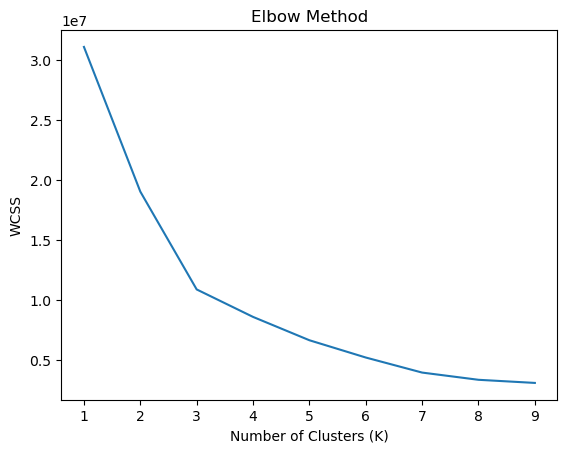

In [ ]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(features_data)

/Users/yaya/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
heart_disease_data['cluster'] = cluster_labels

/var/folders/kg/fftk_3yx6318lz6j3g83d5p80000gq/T/ipykernel_4020/687171112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_data['cluster'] = cluster_labels


In [ ]:
# Perform PCA for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
# Add cluster labels to the PCA results
principal_df['cluster'] = cluster_labels

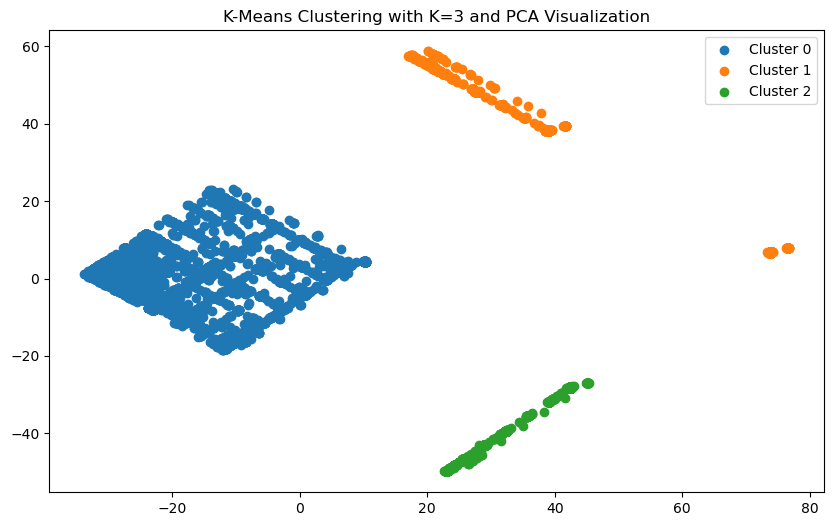

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = principal_df[principal_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering with K=3 and PCA Visualization')
plt.legend()
plt.show()